In [1]:
from datetime import datetime

import datetime as dt
from datetime import date, timedelta

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import csv



In [66]:
data = csv.reader(open('PER10min2009_2022_RS_H.csv', 'r'), delimiter=",", quotechar='|')
column1, column2, column3 = [], [], []

for row in data:
    column1.extend([row[0]])
    column2.extend([row[3]])
    column3.extend([row[3]])
    

In [67]:
len(column3)

730248

In [68]:
column3.pop(0)
column3 = np.array(column3)
column3

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U6')

In [5]:
column1.pop(0)
column1

column2.pop(0)



'RS_Avg'

In [6]:
column1
type(column2[0])
column2 = np.array(column2)
column2 = column2.astype(float)
column2[100]

0.555

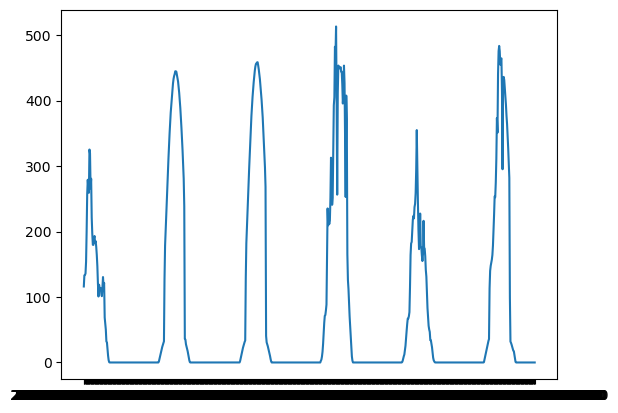

In [7]:
plt.plot(column1[200:1000], column2[200:1000])

# Gràfica de l'Energia per temps (totes les dades)

Text(0.5, 1.0, 'Solar irradiance at Vall Perafita-Claror-Madriu every 10 min')

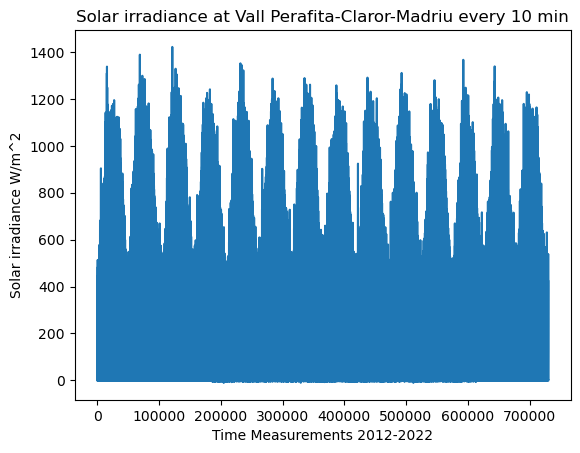

In [8]:
a=int(len(column1))
type(a)
len(column1)
plt.plot(range(a),column2[:a])
plt.xlabel('Time Measurements 2012-2022')
plt.ylabel('Solar irradiance W/m^2')
plt.title('Solar irradiance at Vall Perafita-Claror-Madriu every 10 min')

# Any 2013

Boxplot calculam mitjanes de cada més de RS_Avg i RS_Std i diccionari de 12 mesos com l'exemple abaix

In [9]:
#210341 ---> Inici 2013: 
#year step 52560 rows
#therefore 262601 --> Final 2014 
#-----------------------
#210338:2629899
#-----------------------
#12 months equal size (aproximation)

In [10]:
def chunkify(lst,n):
    return [lst[i::n] for i in range(n)]

In [11]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [12]:
year_2013 = column2[210338:262898]
year_2013 = chunkify(year_2013[year_2013 >=0],12)
year_2013

[array([1.600e-01, 5.625e+01, 2.146e+02, ..., 4.547e+02, 1.141e+02,
        1.580e+01]),
 array([1.290e-01, 6.465e+01, 2.250e+02, ..., 3.023e+02, 9.380e+01,
        2.075e+00]),
 array([  0.768,  78.   , 219.8  , ..., 393.1  , 292.9  , 121.9  ]),
 array([  1.74,  90.4 , 210.8 , ..., 412.7 , 278.6 , 101.5 ]),
 array([  4.045,  93.6  , 240.2  , ..., 440.   , 249.1  ,  88.8  ]),
 array([  7.565,  95.   , 305.2  , ..., 440.9  , 266.2  ,  75.62 ]),
 array([ 13.  ,  93.2 , 282.3 , ..., 454.6 , 207.9 ,  59.81]),
 array([ 20.98, 110.8 , 222.6 , ..., 447.5 , 145.  ,  59.38]),
 array([ 27.71, 122.  , 237.1 , ..., 464.8 , 128.1 ,  61.13]),
 array([ 34.47, 183.5 , 292.6 , ..., 457.9 , 133.5 ,  61.22]),
 array([ 37.28, 212.6 , 214.9 , ..., 458.2 , 129.3 ,  41.28]),
 array([ 44.33, 201.6 , 201.  , ..., 456.5 , 125.9 ,  22.5 ])]

In [13]:
months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_dict = {}
zipped = list(zip(months_list,year_2013))
zipped

for month, array in zipped:
    months_dict[month] = array

print(months_dict)

{'Jan': array([1.600e-01, 5.625e+01, 2.146e+02, ..., 4.547e+02, 1.141e+02,
       1.580e+01]), 'Feb': array([1.290e-01, 6.465e+01, 2.250e+02, ..., 3.023e+02, 9.380e+01,
       2.075e+00]), 'Mar': array([  0.768,  78.   , 219.8  , ..., 393.1  , 292.9  , 121.9  ]), 'Apr': array([  1.74,  90.4 , 210.8 , ..., 412.7 , 278.6 , 101.5 ]), 'May': array([  4.045,  93.6  , 240.2  , ..., 440.   , 249.1  ,  88.8  ]), 'Jun': array([  7.565,  95.   , 305.2  , ..., 440.9  , 266.2  ,  75.62 ]), 'Jul': array([ 13.  ,  93.2 , 282.3 , ..., 454.6 , 207.9 ,  59.81]), 'Aug': array([ 20.98, 110.8 , 222.6 , ..., 447.5 , 145.  ,  59.38]), 'Sep': array([ 27.71, 122.  , 237.1 , ..., 464.8 , 128.1 ,  61.13]), 'Oct': array([ 34.47, 183.5 , 292.6 , ..., 457.9 , 133.5 ,  61.22]), 'Nov': array([ 37.28, 212.6 , 214.9 , ..., 458.2 , 129.3 ,  41.28]), 'Dec': array([ 44.33, 201.6 , 201.  , ..., 456.5 , 125.9 ,  22.5 ])}


   label  lower_whisker  lower_quartile  median  upper_quartile  upper_whisker
0    Jan          0.000         54.7500  274.90         559.200         1222.0
1    Feb          0.002         57.8200  270.40         545.300         1168.0
2    Mar          0.000         54.6800  282.90         553.400         1236.0
3    Apr          0.004         52.5500  277.45         556.625         1233.0
4    May          0.004         54.4350  276.15         548.900         1164.0
5    Jun          0.000         56.5075  275.25         549.750         1236.0
6    Jul          0.002         55.1375  269.65         559.425         1276.0
7    Aug          0.000         55.9925  272.30         549.800         1286.0
8    Sep          0.002         53.4400  276.40         552.400         1209.0
9    Oct          0.008         55.8000  275.35         555.800         1181.0
10   Nov          0.000         55.6725  276.10         547.675         1216.0
11   Dec          0.000         50.5675  275.70     

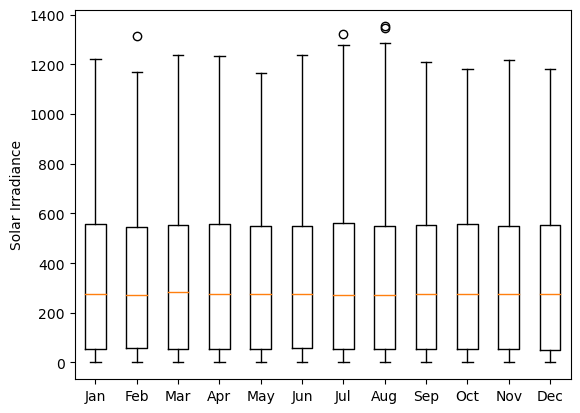

In [14]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bp = plt.boxplot(year_2013, labels=labels)
print(get_box_plot_data(labels, bp))
#plt.ylim(0, 400)
plt.ylabel('Solar Irradiance')
plt.show()

In [15]:
# Està bé??, podem tenir RS_Avg negatiu??????
# Els boxplots no estàn bé hauria de tenir forma gaussiana aproximadament,
#la irradiació hauria d'augmentar amb els mesosd'estiu i disminuir durant l'hivern

In [16]:
pd.read_csv('PER10min2009_2022_RS_H.csv')  


C:\Users\T.C\AppData\Local\Temp\ipykernel_21888\3971847586.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('PER10min2009_2022_RS_H.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg
0,2009-01-01 00:00:00,NaN,17.19,0.0
1,2009-01-01 00:10:00,NaN,15.89,0.0
2,2009-01-01 00:20:00,NaN,14.61,0.0
3,2009-01-01 00:30:00,NaN,14.95,0.0
4,2009-01-01 00:40:00,NaN,13.18,0.0
...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,0.0
730243,2022-12-31 23:20:00,0.0,51.99,0.0
730244,2022-12-31 23:30:00,0.0,51.62,0.0
730245,2022-12-31 23:40:00,0.0,48.46,0.0


In [17]:
date_range = pd.date_range(start = "2009-01-01 00:00:00", 
                           end   = "2022-12-31 23:50:00",
                           periods = 730247)#freq  = "10min"  -->736272

In [18]:
len(date_range) # No coincideixen

730247

In [19]:
len(column2) # 1 + (vigilar)

730247

In [20]:
series = pd.Series(column3,
               index = date_range)

In [21]:
date_range = pd.date_range(start = "2022-01-01", 
                           end   = "2022-02-28 23:59:00",
                           freq  = "H")

In [22]:
ts = pd.Series(list(np.random.randn(len(date_range))),
               index = date_range)

<AxesSubplot: >

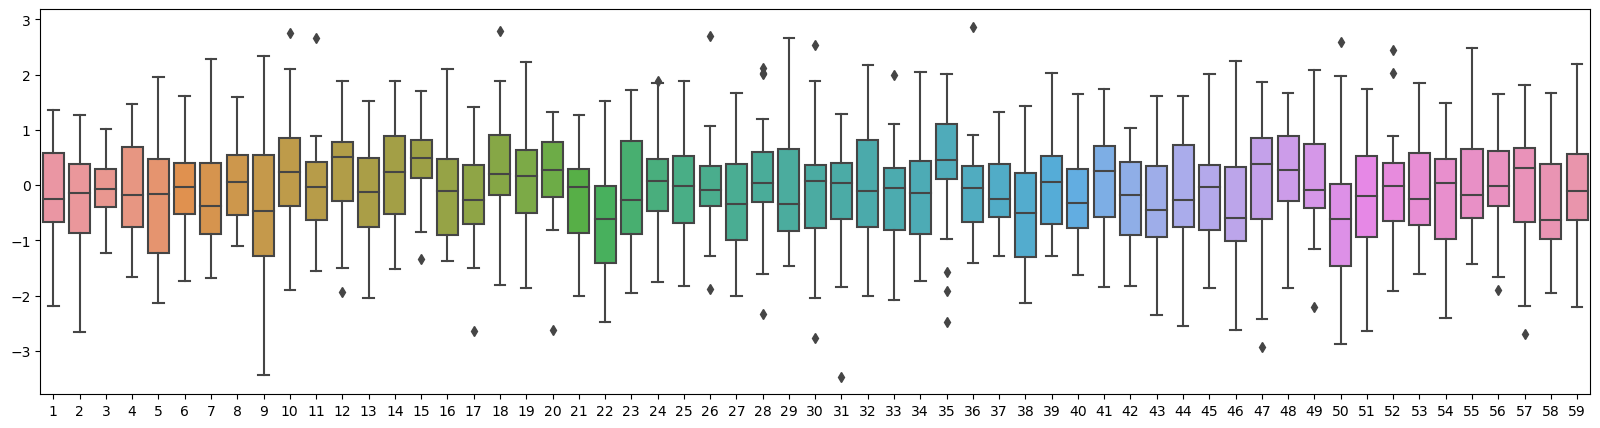

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
sb.boxplot(x = ts.index.dayofyear, 
                y = ts, 
                ax = ax)

In [24]:
df = pd.read_csv('PER10min2009_2022_RS_H.csv', 
                 parse_dates = ['TIMESTAMP'], 
                 index_col='TIMESTAMP')
df

C:\Users\T.C\AppData\Local\Temp\ipykernel_21888\2773520254.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PER10min2009_2022_RS_H.csv',


,RS_Std,HumR1min_Avg,RS_Avg
TIMESTAMP,,,
2009-01-01 00:00:00,NaN,17.19,0.0
2009-01-01 00:10:00,NaN,15.89,0.0
2009-01-01 00:20:00,NaN,14.61,0.0
2009-01-01 00:30:00,NaN,14.95,0.0
2009-01-01 00:40:00,NaN,13.18,0.0
...,...,...,...
2022-12-31 23:10:00,0.0,53.41,0.0
2022-12-31 23:20:00,0.0,51.99,0.0
2022-12-31 23:30:00,0.0,51.62,0.0


<AxesSubplot: xlabel='TIMESTAMP', ylabel='RS_Avg'>

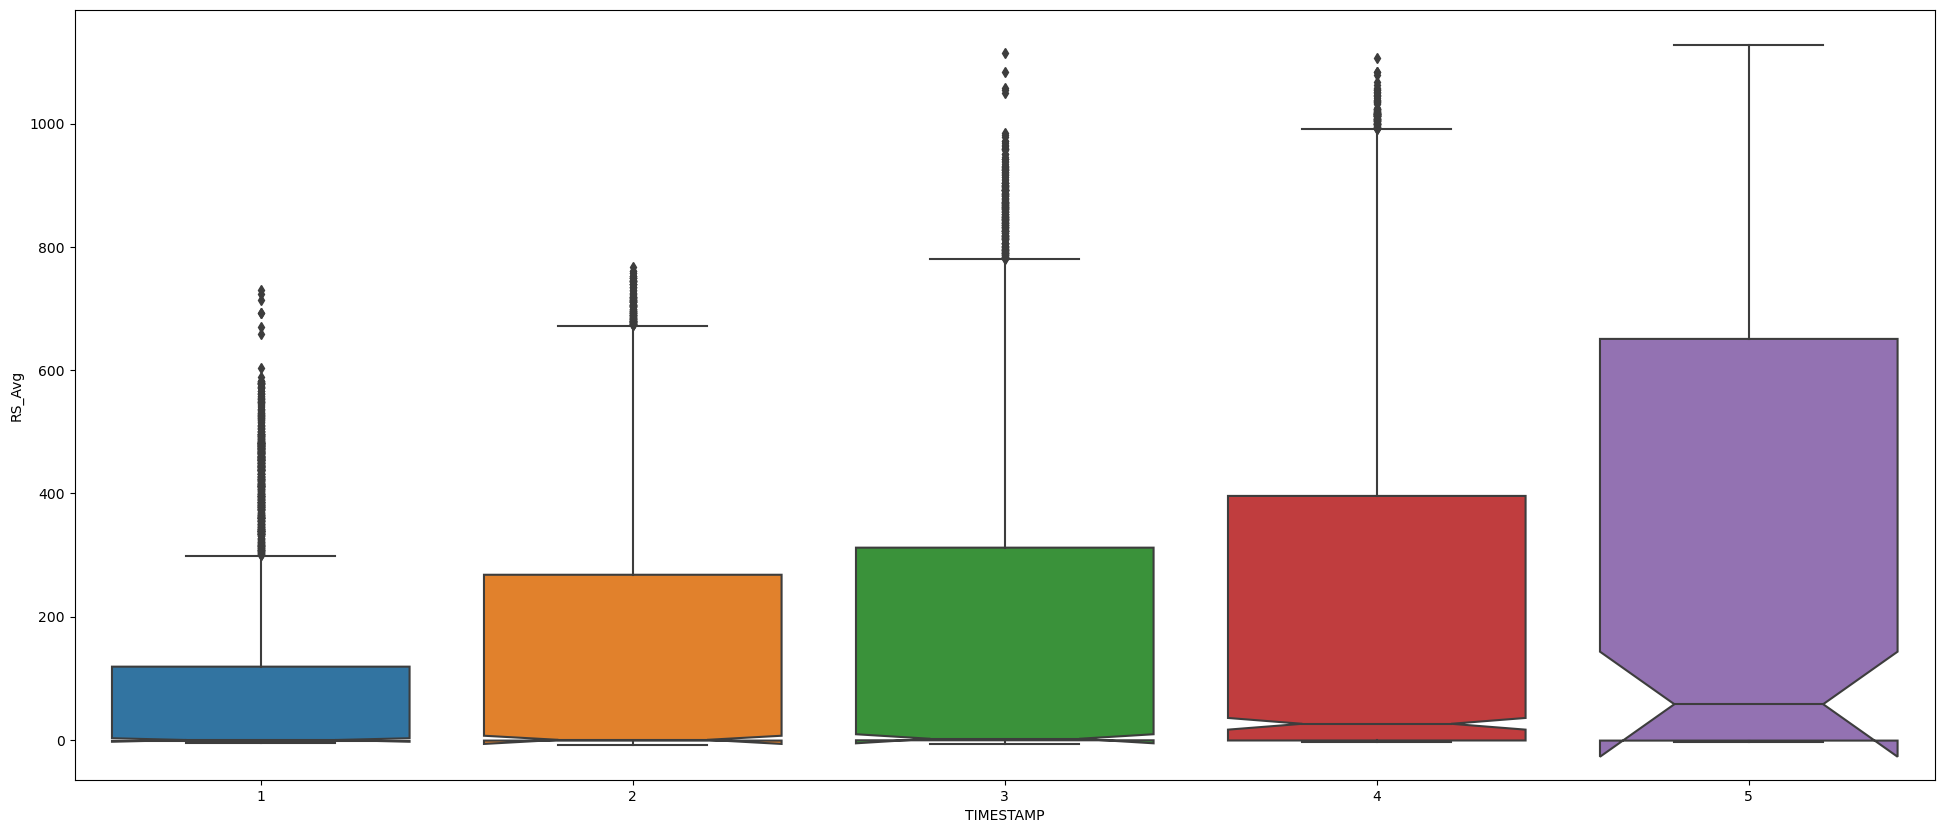

In [26]:
fig, ax = plt.subplots(figsize=(24,10))
sb.boxplot(
    x = df['2013-01-01':'2013-05-01'].index.month,
    y = df['2013-01-01':'2013-05-01']['RS_Avg'], 
    ax = ax,notch = True)

In [71]:
type(column3[100])
column3 = column3.astype(float)
new_col3 = column3.astype(float)
new_col3
type(new_col3[10])

numpy.float64

In [28]:
new_col3[new_col3 >0]

array([ 1.066,  7.089, 13.63 , ...,  7.753,  3.797,  0.745])

Text(0.5, 1.0, 'Monthly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')

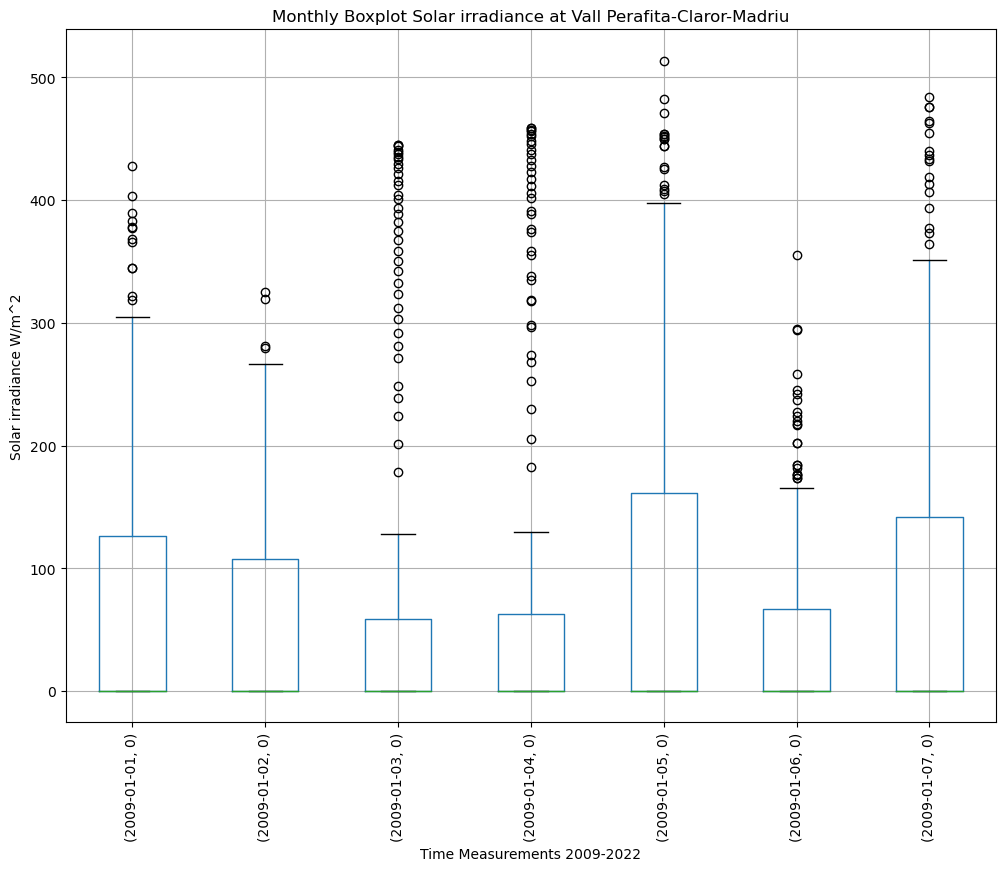

In [29]:
n = 1000
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)#,notch = True)
#ax = plt.gca()
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Time Measurements 2009-2022')
plt.title('Monthly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')


<AxesSubplot: >

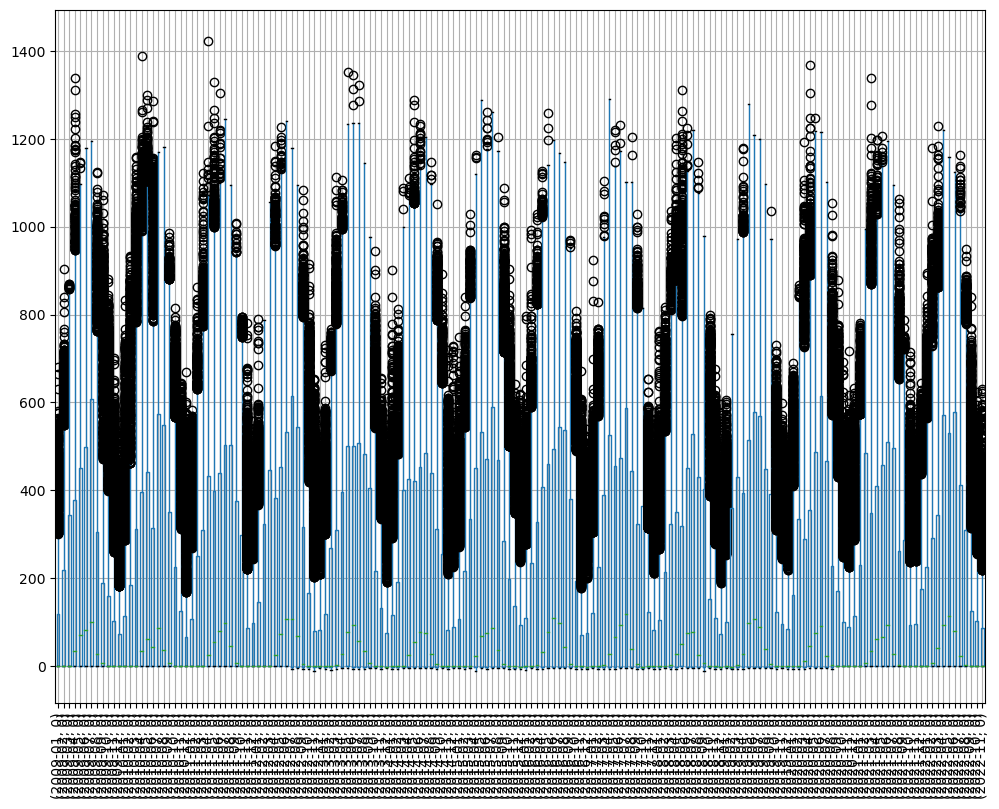

In [60]:
n = len(new_col3)
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y-%m")).boxplot(subplots=False, figsize=(12,9), rot=90)      #PER MESOS
#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)   PER DIES

Text(0.5, 1.0, 'Yearly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')

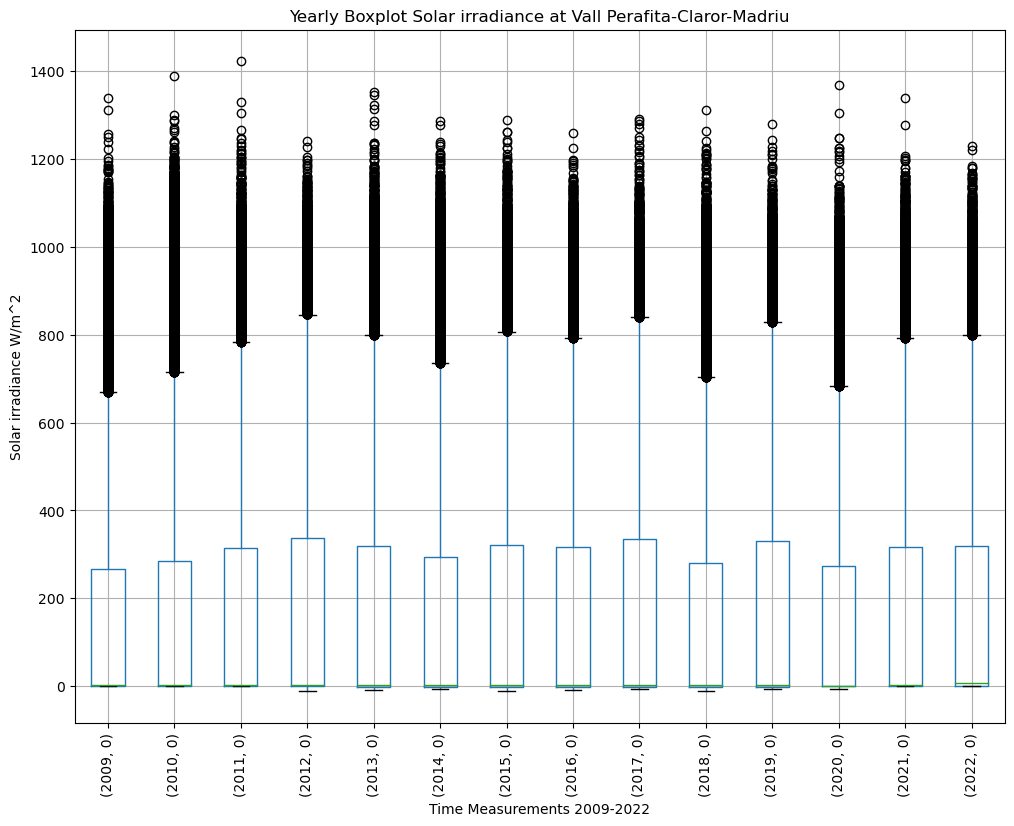

In [41]:
n = len(new_col3)
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y")).boxplot(subplots=False, figsize=(12,9), rot=90)         #PER ANYS
#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)   PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Time Measurements 2009-2022')
plt.title('Yearly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')


# IMPORTANT

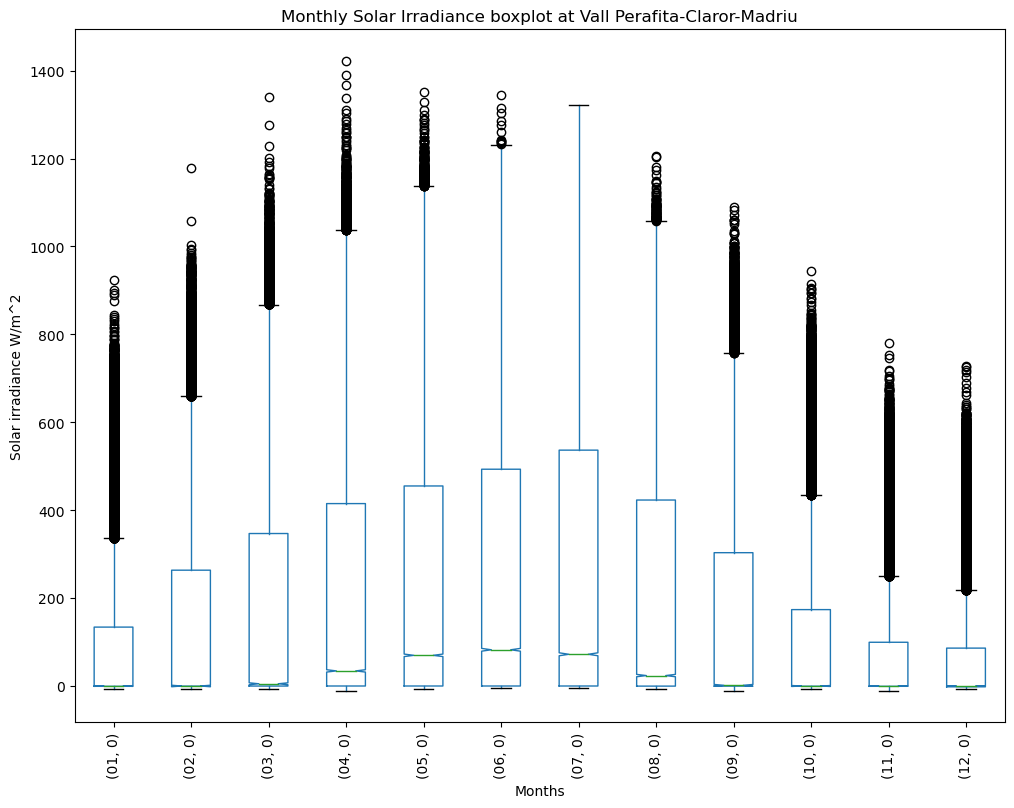

In [46]:
#IMPORTANT

n = len(new_col3)
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)  #PER ANYS


#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)                PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Months')
plt.title('Monthly Solar Irradiance boxplot at Vall Perafita-Claror-Madriu')
plt.grid(visible=None)

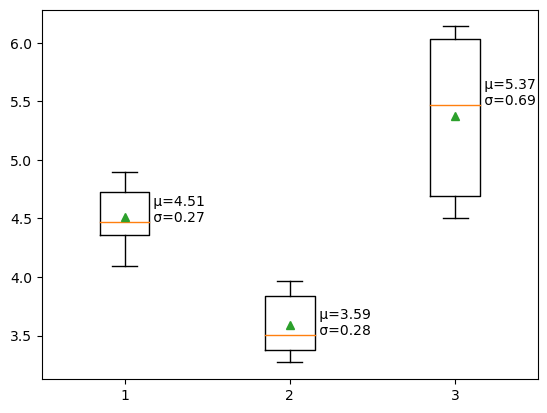

In [45]:
data3 =np.array([[ 4.38,  3.27,  6.07],
   [ 4.35,  3.51,  6.14],
   [ 4.09,  3.33,  5.92],
   [ 4.9 ,  3.97,  5.02],
   [ 4.56,  3.5 ,  4.5 ],
   [ 4.78,  3.95,  4.58]])


m1 = data3.mean(axis=0)
st1 = data3.std(axis=0)

fig, ax = plt.subplots()
bp = ax.boxplot(data3, showmeans=True)



for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1[i], st1[i])
    ax.annotate(text, xy=(x, y))

Text(0.5, 1.0, 'Yearly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')

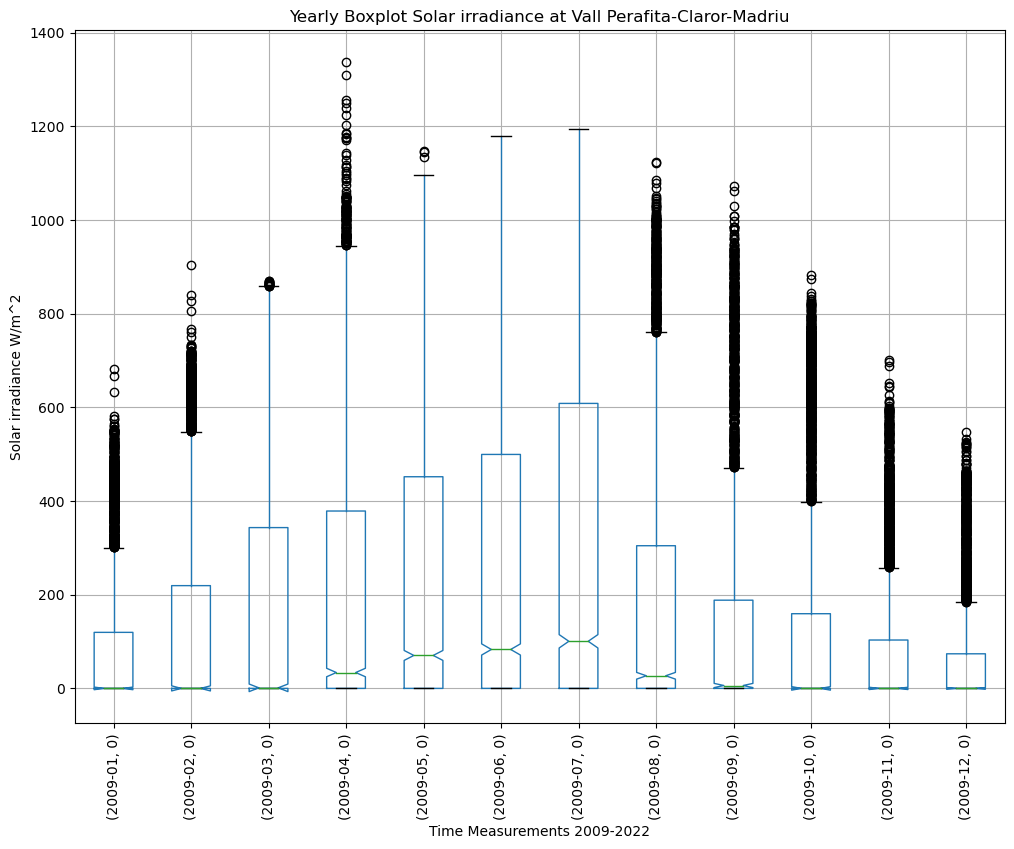

In [32]:

n = 52530
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y-%m")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)         #PER ANYS
#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)   PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Time Measurements 2009-2022')
plt.title('Yearly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')

In [32]:
int(len(new_col3)/12)
print(column1[52530])
for i in range(25):
    print(new_col3[52530 + i])

new_col3[52535]


2009-12-31 23:50:00
0.0
0.0
0.0
0.0
0.005
0.006
0.0
0.0
0.02
0.013
0.007
0.016
0.003
0.0
0.014
0.0
0.069
0.0
0.0
0.041
0.267
0.257
0.0
0.0
0.002


0.006

Text(0.5, 1.0, 'Yearly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')

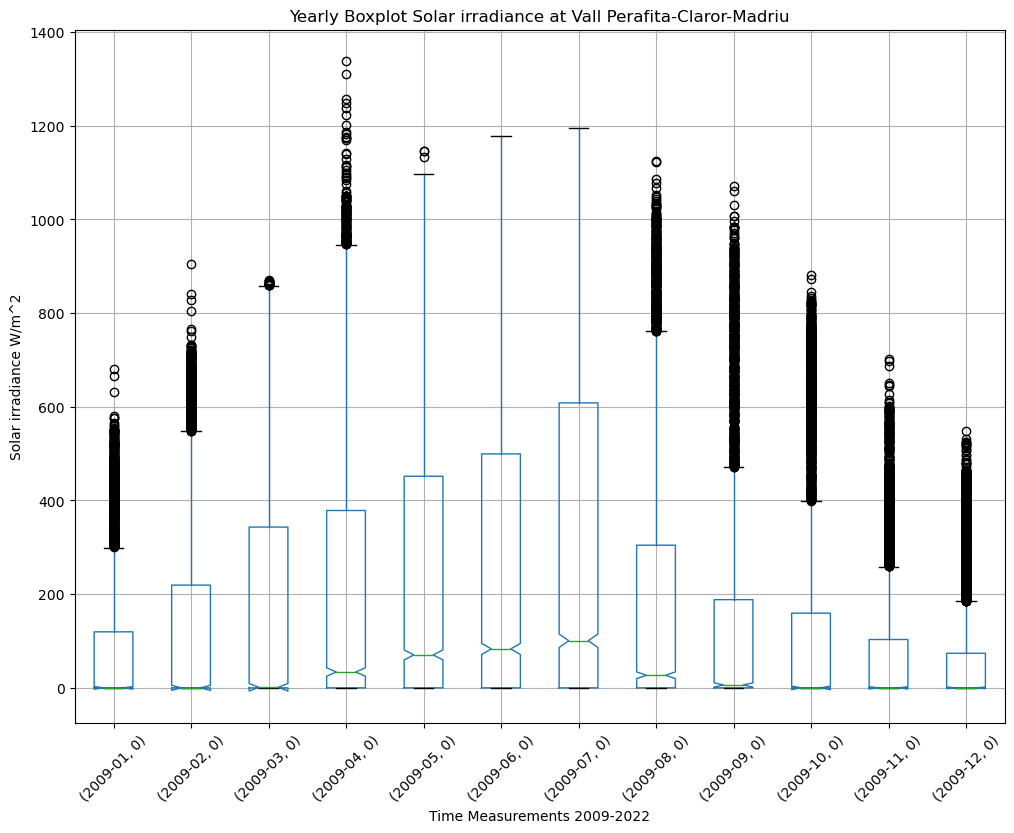

In [33]:
n = 52530
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y-%m")).boxplot(subplots=False, figsize=(12,9), rot=45,notch = True)         #PER ANYS
#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)   PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Time Measurements 2009-2022')
plt.title('Yearly Boxplot Solar irradiance at Vall Perafita-Claror-Madriu')

<AxesSubplot: xlabel='TIMESTAMP', ylabel='RS_Avg'>

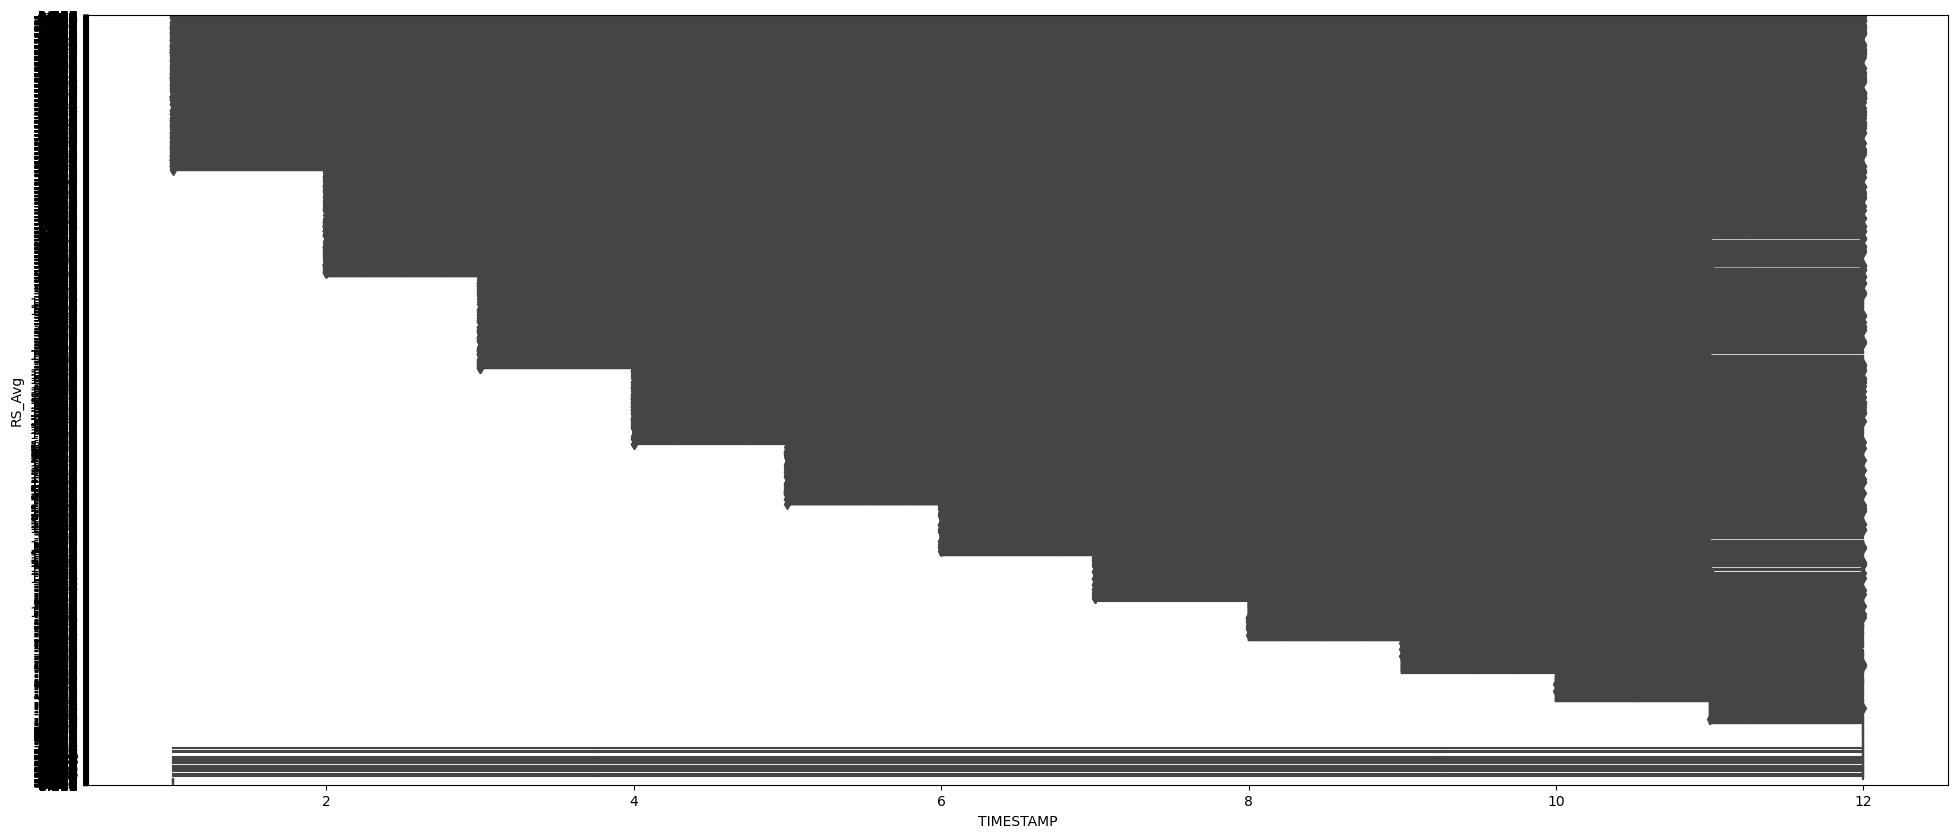

In [29]:
fig, ax = plt.subplots(figsize=(24,10))
sb.boxplot(
    x = df['2013-01-01':'2014-01-01'].index.month,
    y = df['2013-01-01':'2014-01-01']['RS_Avg'], 
    ax = ax)

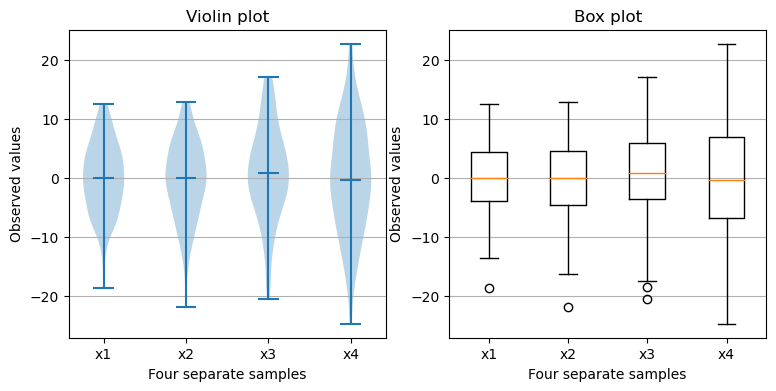

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [ ]:
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y")).(subplots=False, figsize=(12,9), rot=90)         #PER ANYS

In [213]:
#sb.violinplot(x=df["RS_Avg"])

Text(0.5, 1.0, "Yearly Boxplot of 2009's Solar Irradiance at Vall Perafita-Claror-Madriu")

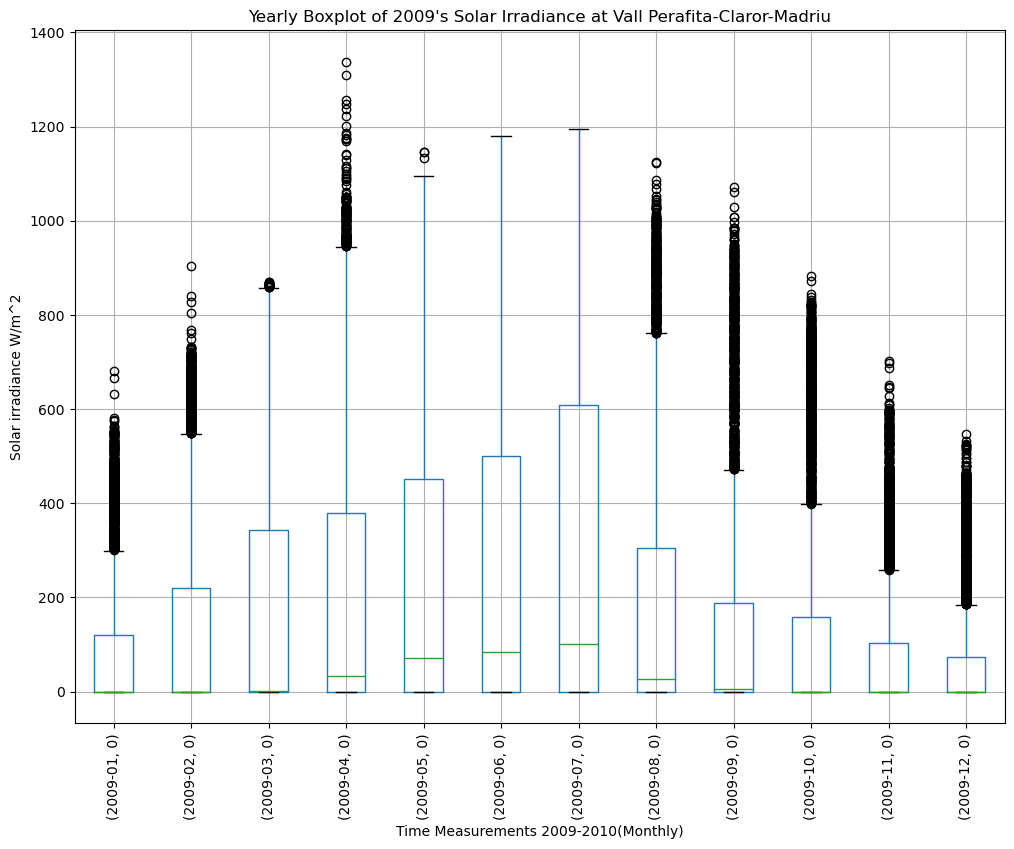

In [217]:
n = 52530
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y-%m")).boxplot(subplots=False, figsize=(12,9), rot=90)         #PER ANYS
#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)   PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Time Measurements 2009-2010(Monthly)')
plt.title("Yearly Boxplot of 2009's Solar Irradiance at Vall Perafita-Claror-Madriu")

[ 28.43 181.8  483.6  ... 355.2  212.1    9.9 ]


<AxesSubplot: >

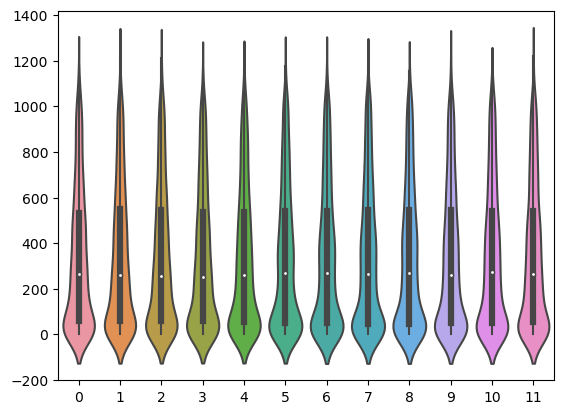

In [215]:
#n = len(new_col3)
#n = 100000
#ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
#ts.groupby(lambda x: x.strftime("%Y-%m")).violinplot(subplots=False, figsize=(12,9), rot=90)

llista = new_col3
#llista = new_col3[new_col3 > 0]
#print(llista[:1000])
#print(llista[0])

llista1 = chunkify(llista,156)
llista2 = chunkify(llista,13)

for i in range(13):
    llista2[i] = llista2[i][llista2[i]>0]

for i in range(156):
    llista1[i] = llista1[i][llista1[i]>0]
    

index=pd.date_range(start="2009-01-01", periods=n, freq="10min")

    
#llista1[0] = llista1[0][llista1[0]>0]
#llista1[1] = llista1[1][llista1[1]>0]



print(llista1[0])
sb.violinplot(llista1[:12])
#plt.setylog()

#plt.ylim(0,150)

    
#sb.violinplot(data = df['RS_Avg'][:1000])#,split = True)


#Problema amb els violinplots no acaben de tenir sentit no s'assemblen al que un esperaria, (i.e més irradiació solar en l'estiu)

In [219]:
print(len(new_col3[new_col3>0]))
len(new_col3>0)
#Problema amb llevar els zeros i negatius reestructura l'ordre dels arrays després no podem saber a quin dia correspon

401041


730247

# Problema asignant dades temporals si llevam les nits, salts de temps discontinus... ---> solució asignam nans




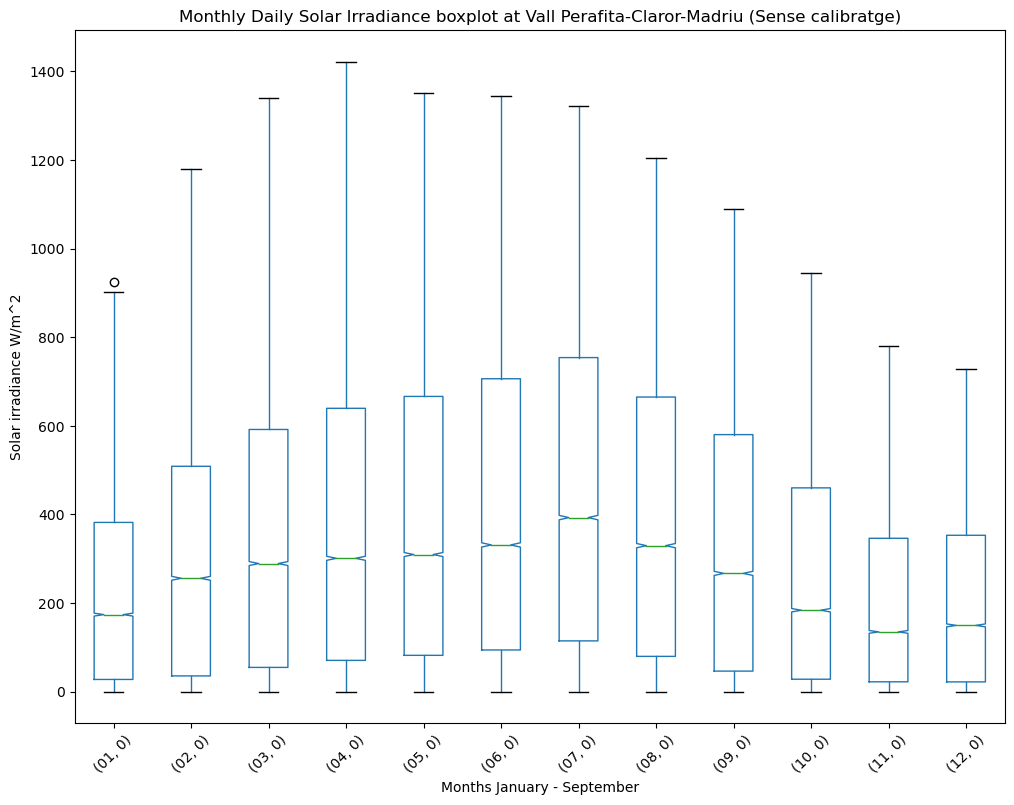

In [105]:
test_arr = new_col3
test_arr[test_arr <= 0] = np.nan

n = len(test_arr)
ts = pd.DataFrame(test_arr, index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False, figsize=(12,9), rot=45, notch = True) #PER ANYS
#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)   PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Months January - September')
plt.title("Monthly Daily Solar Irradiance boxplot at Vall Perafita-Claror-Madriu (Sense calibratge)")
plt.grid(visible=None)


# Dubte (Grau d'Ocultació?) febrer molt més que Novembre, Desembre i Gener  encara que a tota  Andorra la Vella, Escaldes, Encamp i Pas de la Casa el mes més fred és Febrer (Sospitós)

# MARÇ desviació enorme moltíssims outliers

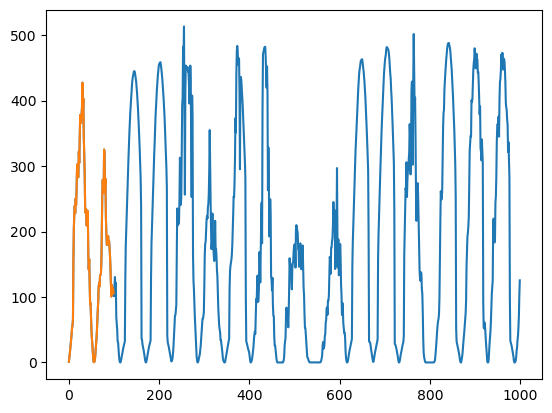

In [49]:
positiu = new_col3[new_col3>0]

plt.plot(positiu[:1000])
plt.plot(positiu[:100])

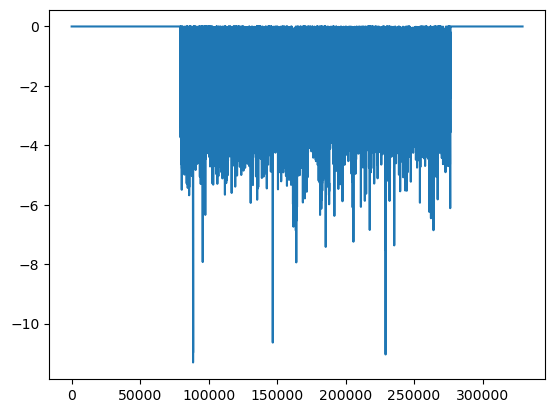

In [34]:
nou = new_col3[new_col3 <=0]

ts = pd.DataFrame(nou)
plt.plot(ts)
#ts.groupby(lambda x: x.strftime("%Y")).boxplot(subplots=False, figsize=(12,9), rot=90)



# Pujar els positius(més gran que zero) 2 unitats  i els negatius passar a zero CALIBRATGE

# Guardar nou array per a tenir, el dos corregit i no corregit

In [110]:
def first_neg(lst):
        res = [i for i,x in enumerate(lst) if x<0]
        return None if res == [] else res[0]

In [111]:
column3
first_neg(column3)

184393

Vigilar que els nans no s'hagin introduit a l'array

In [83]:
last = first_neg(column3[::-1])
last

116840

In [101]:
last = len(column3) - first_neg(column3[::-1])
last

613407

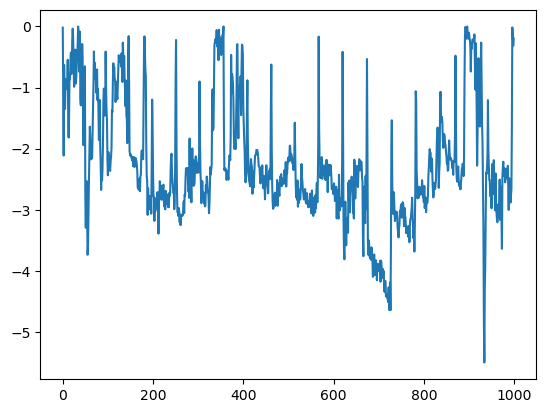

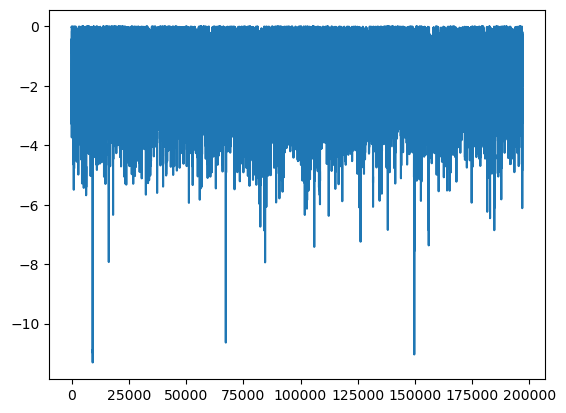

La dimensió de l'array (chunk negatiu) és : 197015
Average is -1.9986383574854711 and values should therefore be increased by  1.9986383574854711


In [96]:
negatius = column3[column3 < 0]

average = np.average(negatius)

plt.plot(negatius[:1000])
plt.show()
plt.plot(negatius)
plt.show()
print("La dimensió de l'array (chunk negatiu) és : {}".format(len(negatius)))
print("Average is {} and values should therefore be increased by  {}".format(average,abs(average)))


# El calibratge hauria de ser de sumar dos +2 a tota la sèrie temporal desde 2012-07-04 a 2020-10-07

In [108]:
aa = np.array([1,2,2,8,9])
aa

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
aa[2:-2] += 1
aa

#Exemple de com

array([1, 2, 4, 5, 6, 7, 8, 8, 9])

In [ ]:
# Llavors fariem de column3[first_neg:last_neg] += 2

In [61]:
print(negatius[:100])

[]


In [41]:
len(new_col3) - last

613407

In [ ]:
# Hi ha negatius desde 184393 fins 613407

In [37]:
aa = [1,2,3,4,5]

In [38]:
aa[::-1]

[5, 4, 3, 2, 1]

In [112]:
df['RS_Avg'][:n]

TIMESTAMP
2009-01-01 00:00:00    0.0
2009-01-01 00:10:00    0.0
2009-01-01 00:20:00    0.0
2009-01-01 00:30:00    0.0
2009-01-01 00:40:00    0.0
                      ... 
2010-12-31 18:00:00    0.0
2010-12-31 18:10:00    0.0
2010-12-31 18:20:00    0.0
2010-12-31 18:30:00    0.0
2010-12-31 18:40:00    0.0
Name: RS_Avg, Length: 105060, dtype: object

In [ ]:
# Correcció dades valors negatiu, mirar si són dades nocturnes

#Calibratge

#Any a any

#Cercar llibreria solar, altura solar o angle zenital

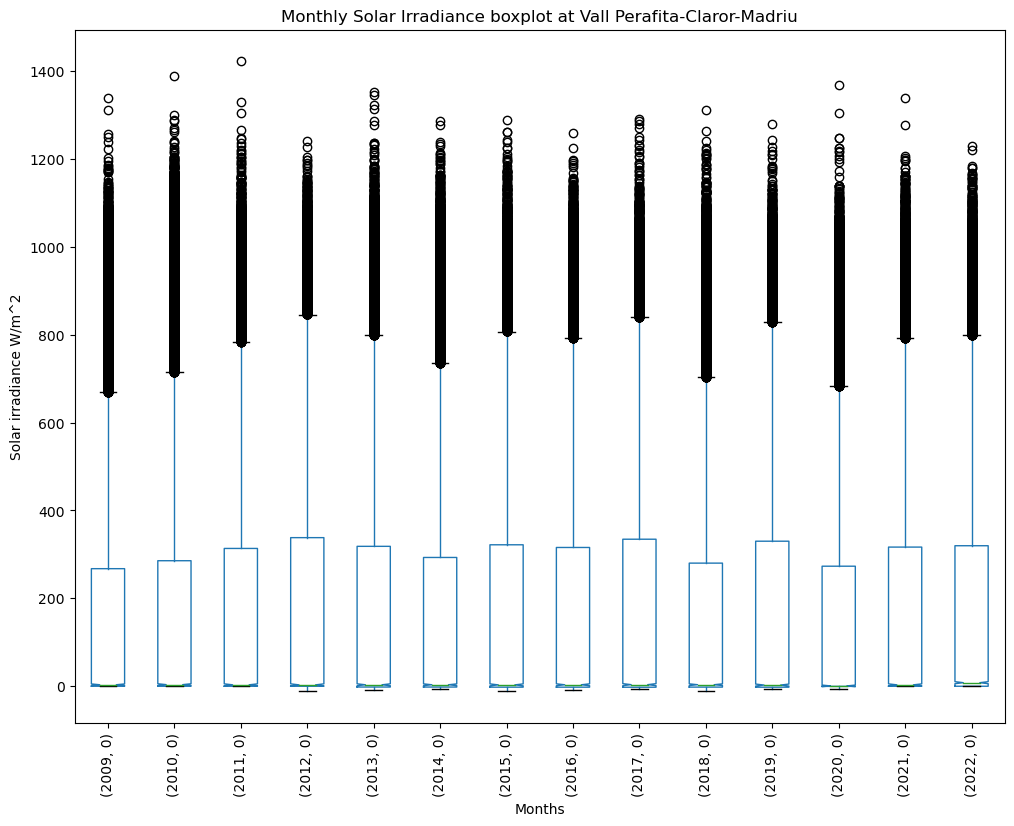

In [47]:
#IMPORTANT

n = len(new_col3)
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="2009-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%Y")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)          #PER ANYS


#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)                PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Months')
plt.title('Monthly Solar Irradiance boxplot at Vall Perafita-Claror-Madriu')
plt.grid(visible=None)

In [64]:
for i in df.index:
    if dt.time(0,0) < df['TIMESTAMP'] < dt.time(4,0) :
        d['RS_Avg'].loc[i] = np.nan
            

KeyError: 'TIMESTAMP'

In [65]:
df.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:10:00',
               '2009-01-01 00:20:00', '2009-01-01 00:30:00',
               '2009-01-01 00:40:00', '2009-01-01 00:50:00',
               '2009-01-01 01:00:00', '2009-01-01 01:10:00',
               '2009-01-01 01:20:00', '2009-01-01 01:30:00',
               ...
               '2022-12-31 22:20:00', '2022-12-31 22:30:00',
               '2022-12-31 22:40:00', '2022-12-31 22:50:00',
               '2022-12-31 23:00:00', '2022-12-31 23:10:00',
               '2022-12-31 23:20:00', '2022-12-31 23:30:00',
               '2022-12-31 23:40:00', '2022-12-31 23:50:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=730247, freq=None)

In [66]:
d.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:10:00',
               '2009-01-01 00:20:00', '2009-01-01 00:30:00',
               '2009-01-01 00:40:00', '2009-01-01 00:50:00',
               '2009-01-01 01:00:00', '2009-01-01 01:10:00',
               '2009-01-01 01:20:00', '2009-01-01 01:30:00',
               ...
               '2022-11-20 02:10:00', '2022-11-20 02:20:00',
               '2022-11-20 02:30:00', '2022-11-20 02:40:00',
               '2022-11-20 02:50:00', '2022-11-20 03:00:00',
               '2022-11-20 03:10:00', '2022-11-20 03:20:00',
               '2022-11-20 03:30:00', '2022-11-20 03:40:00'],
              dtype='datetime64[ns]', length=730247, freq='10T')

In [75]:
d.index[0]

Timestamp('2009-01-01 00:00:00', freq='10T')

In [67]:
start_date = date(2009, 1, 1)
end_date = date(2022, 12, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    print(start_date.strftime("%Y-%m-%d :"))
    start_date += delta

NameError: name 'date' is not defined

In [30]:
data0 = pd.read_csv('PER10min2009_2022_RS_H.csv')
#data1 = pd.read_csv('2010-11.csv')



data0['TIMESTAMP'] = pd.to_datetime(data0['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

C:\Users\T.C\AppData\Local\Temp\ipykernel_28524\358305551.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data0 = pd.read_csv('PER10min2009_2022_RS_H.csv')


In [ ]:
"""
df = pd.read_csv('PER10min2009_2022_RS_H.csv', 
                 parse_dates = ['TIMESTAMP'], 
                 index_col='TIMESTAMP')
df


def parse_date(date):
    if date == '':
        return None
    else:
        return dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date()

"""

data0 = pd.read_csv('PER10min2009_2022_RS_H.csv')
#data1 = pd.read_csv('2010-11.csv')



data0['TIMESTAMP'] = pd.to_datetime(data0['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

"""
d['Date'] = pd.to_datetime(data0['Date'], format='%d/%m/%y')


custom_date_parser = lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S") 
df = pd.read_csv('PER10min2009_2022_RS_H.csv', index_col = 'TIMESTAMP', parse_dates = ['TIMESTAMP'], date_parser = custom_date_parser)

    
"""

np_arr = np.empty(len(new_col3))

for x in data0.loc[(data0['TIMESTAMP'].dt.hour.eq(0))
                   | (data0['TIMESTAMP'].dt.hour.eq(1))
                  | (data0['TIMESTAMP'].dt.hour.eq(2))
                   | (data0['TIMESTAMP'].dt.hour.eq(3))
                  | (data0['TIMESTAMP'].dt.hour.eq(4))]['RS_Avg']:
    np.append(np_arr,x)


    # NO VA BÉ

C:\Users\T.C\AppData\Local\Temp\ipykernel_28524\2852102618.py:16: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data0 = pd.read_csv('PER10min2009_2022_RS_H.csv')
